## Optimizing Newspaper and Magazine Shelf Space and Pricing for Maximum Profit

### Decision Variables

* $x_A, x_B, x_m \in \Z_+$ : indicating the number of Newspaper $A$, Newspaper $B$, and Magazines purchased.
* $y_A, y_B, y_m, y_p \in \Z_+$ : indicating the number of Newspaper $A$ sold individually, Newspaper $B$ sold, Magazines sold individually, and “bundle” (newspaper $A$ + magazine) units sold.
* $z_A, z_B \in \Z_+ $ : indicating the number of unsold/returned copies of Newspaper $A$ and $B$.

### Parameters

* $c_A, c_B, c_m$ : Purchase (cost) prices for $A,B$ and magazine, respectively. (B is cheaper)
* $p_A​,p_B​,p_m​$ : Selling prices (per unit) for $A, B$ and magazine, respectively.
* $r_A, r_B$ : Refunds (return values) for unsold copies of $A$ and $B$.
    - $r_A =  0.40 c_A$
    - $r_B = 0.10 c_B$ 
* $d_A, d_B, d_m, d_p$ :  Demands (maximum potential sales) for $A$, $B$, magazine, and the bundle, respectively.
* $C$: Total Budget Available
* $S_n, S_m$: Shelf capacities for newspapers and magazines, respectively.
* Discount: 8% off $(p_A+p_m)$ for each bundle sale, so bundle revenue is $0.92 (pA+pm)$.

### Constraints

1. Budget Constraints

    $c_A x_A + c_B x_B + c_m x_m \leq C$

2. Shelf-Space Constraints

    * Newspapers (both $A$ and $B$ share the same shelf):

        $x_A +  x_B  \leq S_n$
    
    * Magazines have their own shelf:
    
        $ x_m \leq S_m$

3. Demand Constraints:

    $y_A \leq d_A$, <br>
    $y_B \leq d_B$, <br>
    $y_m \leq d_m$, <br>
    $y_p \leq d_p$, <br>

4. Purchase‐to‐Sale (and Returns) Balances

    * Newspaper $B$

        $y_B +  z_B  = x_B$
    
    * Newspaper $A$:
    
        $y_A + y_p + z_A  = x_A$ (the bundle $y_p$ also uses up an A)

    * Magazine (assuming no returns, just leftover is wasted or not allowed):
    
        $y_m + y_p  \leq x_m$

5. Nonnegativity

    $x_A​,x_B​,x_m​,y_A​,y_B​,y_m​,y_p​,z_A​,z_B​ \geq 0$


    



### Objective Function

Maximize total profit, computed as:

* Revenue from individual newspaper and magazine sales:

    $p_A​ y_A ​+ p_B​ y_B ​+ p_m​ y_m​$

* Revenue from bundle sales at 8% discount:

    $0.92 (p_A + p_m) y_p​$

* Refund for unsold units of $A$ and $B$:

    $r_A ​z_A ​+ r_B ​z_B$

* Minus the total purchase cost:

    $−c_A ​x_A​ − c_B​ x_B​ − c_m​ x_m​​$


Putting it all together:

\begin{equation}

max \ \ p_A​ y_A ​+ p_B​ y_B ​+ p_m​ y_m + 0.92 (p_A + p_m) y_p + r_A ​z_A ​+ r_B ​z_B −c_A ​x_A​ − c_B​ x_B​ − c_m​ x_m​

\end{equation}


In [1]:
import cplex 
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import time
import pandas as pd
import numpy as np

In [2]:
m = Model('newsvendor_shelf', log_output=True)

Defining Decision Variables

In [3]:
xA = m.continuous_var(name='xA', lb=0)
xB = m.continuous_var(name='xB', lb=0)
xm = m.continuous_var(name='xm', lb=0)
yA = m.continuous_var(name='yA', lb=0)
yB = m.continuous_var(name='yB', lb=0)
ym = m.continuous_var(name='ym', lb=0)
yp = m.continuous_var(name='yp', lb=0)
zA = m.continuous_var(name='zA', lb=0)
zB = m.continuous_var(name='zB', lb=0)


Example Parameter Values

In [4]:
# budget
C = 500

# costs
cA = 4
cB = 4
cm = 3

# selling prices
pA = 9
pB = 9
pm = 5

# demand
dA = 30
dB = 35
dm = 25
dp = 12

# shelf capacities
Sn = 35
Sm = 25

# return values
rA = 0.40 * cA
rB = 0.10 * cB

# pack discount
pp = 0.92 * (pA + pm)


Defining Constraints

In [5]:
# budget constraint
m.add_constraint(xA * cA + xB * cB + xm * cm <= C)

# shelf capacity constraints
m.add_constraint(xA + xB <= Sn)
m.add_constraint(xm <= Sm)

# demand constraints
m.add_constraint(yA <= dA)
m.add_constraint(yB <= dB)
m.add_constraint(ym <= dm)
m.add_constraint(yp <= dp)

# purchase to sale balances 
m.add_constraint(yA + yp + zA == xA)
m.add_constraint(yB + zB == xB)
m.add_constraint(ym + yp <= xm)


docplex.mp.LinearConstraint[](ym+yp,LE,xm)

In [6]:
obj_fn = pA * yA + pB * yB + pm * ym + 0.92 * (pA + pm) * yp + rA * zA + rB * zB - cA * xA - cB * xB - cm * xm
m.set_objective('max', obj_fn)

In [7]:
m.solve(log_output=True)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
LP Presolve eliminated 8 rows and 7 columns.
Aggregator did 2 substitutions.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.01 ticks)


docplex.mp.solution.SolveSolution(obj=225,values={xB:35,xm:25,yB:35,ym:2..

In [8]:
m.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [9]:
#print model
print(m.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: newsvendor_shelf

Maximize
 obj: - 4 xA - 4 xB - 3 xm + 9 yA + 9 yB + 5 ym + 12.880000000000 yp
      + 1.600000000000 zA + 0.400000000000 zB
Subject To
 c1: 4 xA + 4 xB + 3 xm <= 500
 c2: xA + xB <= 35
 c3: xm <= 25
 c4: yA <= 30
 c5: yB <= 35
 c6: ym <= 25
 c7: yp <= 12
 c8: yA + yp + zA - xA = 0
 c9: yB + zB - xB = 0
 c10: ym + yp - xm <= 0

Bounds
End



In [10]:
# objective value
print(m.objective_value)

225.0


In [11]:
# decision variables values
print(m.solution.get_value(xA))
print(m.solution.get_value(xB))
print(m.solution.get_value(xm))
print(m.solution.get_value(yA))
print(m.solution.get_value(yB))
print(m.solution.get_value(ym))
print(m.solution.get_value(yp))
print(m.solution.get_value(zA))
print(m.solution.get_value(zB))

0
35.0
25.0
0
35.0
25.0
0
0
0


## Considering The Stochastic Context

Now, since the deterministic linear model is completed. We will model the problem as two-stage decision making process

### Solving the Newsvendor problem via Deterministic Equivalent Problem:

Assume we know the random variables: $D_A, D_B, D_p, D_m$ that describes the behavior of the demands: $d_A, d_B, d_p, d_m$

#### First Stage Problem

$
\begin{array}{rl}
\min_x & c^Tx - \mathbb{E}[R(x, D)] ={\color{red}\mathbb{E}[cx-R(x, D)]}\\
\text{s.t} & x_A + x_B \leq S_n\\
& x_m \leq S_m\\
& c^Tx \leq C\\
& x \geq 0
\end{array}
$

Let the vectors be: 

$
\begin{array}{rcl}
c & = & (c_A, c_B, c_m); \\
x & = & (x_A, x_B, x_m); \\
D & = & (D_A, D_B, D_m, D_p); \\
\end{array}
$

#### Second Stage Problem

$
\begin{array}{rrl}
R(x,d) = &\max_{y,z} & py + rz\\
& \text{s.t} & y\leq d\\
 && y_A+y_p+z_A \leq x_A \\
 && y_B+z_B \leq x_B \\
 && y_p + y_m \leq x_m \\
 && y,z\geq 0
\end{array}
$

Let the vectors be: 

$
\begin{array}{rcl}
z & = & (z_A, z_B); \\
y & = & (y_A, y_B, y_m, y_p); \\
p & = & (p_A, p_B, p_m, 0.92(p_A+p_m)); \\
r & = & (r_A, r_B); \\
\end{array}
$

Transforming the second stage in minimizing...

#### Second Stage Problem
$\begin{array}{rrrl}
Q(x,d)=&-R(x,d) = &\min_{y,z} & -py - rz\\
&& \text{s.t} & y\leq d\\
    &&& y_A+y_p+z_A \leq x_A \\
    &&& y_B+z_B \leq x_B \\
    &&& y_p + y_m \leq x_m \\
    &&& y,z\geq 0
\end{array}
$

#### Deterministic Equivalent Problem
$\begin{array}{rl}
\min_{x, y_{wi}, z_{wi}} & \mathbb{E}[c^Tx - py_{wi} - rz_{wi}] = {\color{red}\sum_i \mathbb{P}(w_i)[c^Tx - py_{w_i} - rz_{w_i}]} = {\color{red}\sum_i \frac{1}{n}[c^Tx - py_{w_i} - rz_{w_i}]}\\
\text{s.t} & x_A + x_B \leq S_n\\
& x_m \leq S_m\\
& c^Tx \leq C\\
& y_{wi} \leq d_{wi}\\
& y_{A_{wi}}+y_{p_{wi}}+z_{A_{wi}} \leq x_A \\
& y_{B_{wi}}+z_{B_{wi}} \leq x_B \\
& y_{p_{wi}} + y_{m_{wi}} \leq x_m \\
& x,y,z\geq 0 \\
\end{array}
$

In [12]:
import cplex 
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the data from the Excel file
data = pd.read_excel('./samples.xlsx')

In [14]:
m_demand = Model('newsvendor_shelf', log_output=True)

In [15]:
data.sample(5)

,newspaper1,newspaper2,magazine,pack
374,22,17,17,16
885,12,39,41,17
682,47,9,23,18
248,9,96,24,11
981,29,33,44,6


### Parameters

Example Parameter Values

In [16]:
# budget
C = 500

# costs
cA = 4.5
cB = 0.9 * cA
cm = 7.5

# selling prices
pA = 18
pB = 0.9 * pA
pm = 22

# getting demands
# dA = data['newspaper1']
# dB = data['newspaper2']
# dm = data['magazine']
# dp = data['pack']
d = data[['newspaper1', 'newspaper2', 'magazine', 'pack']].values.T


# shelf capacities
Sn = 150
Sm = 100

# return values
rA = 0.40 * cA
rB = 0.10 * cB

# pack discount
pp = 0.92 * (pA + pm)

# number of demand scenarios
n = len(data.index)     


In [17]:
p = [pA, pB, pm, pp]
r = [rA, rB]
c = [cA, cB, cm]
# d = [dA, dB, dm, dp]
S = [Sn, Sm]

### Decision variables

In [18]:
# Decision variables
x = m_demand.continuous_var_matrix(3, 1, lb=0, name='x')  # x_A, x_B, x_m (first stage)
y = m_demand.continuous_var_matrix(4, n, lb=0, name='y')  # y_A, y_B, y_m, y_p
z = m_demand.continuous_var_matrix(2, n, lb=0, name='z')  # z_A, z_B



### Constraints

In [19]:
# shelf capacity constraints
m_demand.add_constraint(x[0, 0] + x[1, 0] <= Sn)
m_demand.add_constraint(x[2, 0] <= Sm)

# budget constraint
m_demand.add_constraint(sum(x[j, 0] * c[j] for j in range(3)) <= C)

for i in range(n):
    # demand constraints
    m_demand.add_constraint(y[0, i] <= d[0][i])  # y_A ≤ D_A
    m_demand.add_constraint(y[1, i] <= d[1][i])  # y_B ≤ D_B
    m_demand.add_constraint(y[2, i] <= d[2][i])  # y_m ≤ D_m
    m_demand.add_constraint(y[3, i] <= d[3][i])  # y_p ≤ D_p
    
    # purchase to sale balances
    m_demand.add_constraint(y[0, i] + y[3, i] + z[0, i] <= x[0, 0])  # y_A + y_p + z_A ≤ x_A
    m_demand.add_constraint(y[1, i] + z[1, i] <= x[1, 0])            # y_B + z_B ≤ x_B
    m_demand.add_constraint(y[2, i] + y[3, i] <= x[2, 0])            # y_m + y_p ≤ x_m




### Objective Function

In [20]:
obj_fn = (1 / n) * (
    sum(c[j] * x[j, 0] for j in range(3)) -
    sum(p[j] * y[j, i] for j in range(4) for i in range(n)) -
    sum(r[j] * z[j, i] for j in range(2) for i in range(n))
)
m_demand.set_objective('min', obj_fn)


In [21]:
# Solve
m_demand.solve()

# Print results
print("Objective value:", m_demand.objective_value)
print("Status:", m_demand.solve_status)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Parallel mode: deterministic, using up to 4 threads for concurrent optimization:
 * Starting dual Simplex on 1 thread...
 * Starting Barrier on 3 threads...
Tried aggregator 1 time.
LP Presolve eliminated 4001 rows and 0 columns.
Reduced LP has 3002 rows, 6003 columns, and 10005 nonzeros.
Presolve time = 0.02 sec. (7.49 ticks)
Symmetry aggregator did 2841 additional substitutions.

Iteration log . . .
Iteration:     1   Scaled dual infeas =             3.146950
Iteration:   132   Scaled dual infeas =             1.941676
Iteration:   229   Scaled dual infeas =             1.737962
Iteration:   352   Scaled dual infeas =             1.406182
Iteration:   442   Scaled dual infeas =             1.231130
Iteration:   774   Scaled dual infeas =             0.622800
Iteration:  1106   Scaled dual infeas =             0.019800
Iteration:  1117   Dual objective     =         -2411.380947
It

In [22]:
# decision variables values
for i in range(len(data.index)):
    print(f"Sample {i+1}:")
    print("xA:", m_demand.solution.get_value(x[0,0]))
    print("xB:", m_demand.solution.get_value(x[1,0]))
    print("xm:", m_demand.solution.get_value(x[2,0]))
    print("yA:", m_demand.solution.get_value(y[0,i]))
    print("yB:", m_demand.solution.get_value(y[1,i]))
    print("ym:", m_demand.solution.get_value(y[2,i]))
    print("yp:", m_demand.solution.get_value(y[3,i]))
    print("zA:", m_demand.solution.get_value(z[0,i]))
    print("zB:", m_demand.solution.get_value(z[1,i]))
    print()

Sample 1:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 13.0
yB: 26.0
ym: 30.226666666666674
yp: 5.0
zA: 11.0
zB: 0

Sample 2:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 23.773333333333326
yB: 17.0
ym: 30.0
yp: 5.226666666666674
zA: 0
zB: 9.0

Sample 3:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 22.0
yB: 26.0
ym: 28.226666666666674
yp: 7.0
zA: 0
zB: 0

Sample 4:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 18.0
yB: 26.0
ym: 24.226666666666674
yp: 11.0
zA: 0
zB: 0

Sample 5:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 19.773333333333326
yB: 9.0
ym: 26.0
yp: 9.226666666666674
zA: 0
zB: 17.0

Sample 6:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 13.0
yB: 26.0
ym: 22.226666666666674
yp: 13.0
zA: 3.0
zB: 0

Sample 7:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 10.0
yB: 26.0
ym: 27.226666666666674
yp: 8.0
zA: 11.0
zB: 0

Sample 8:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 19.0
yB: 26.0
ym: 16.0
yp: 10.0
zA: 0
zB: 0

Sample 9:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 7.0
yB: 26.0



Sample 150:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 19.0
yB: 26.0
ym: 25.226666666666674
yp: 10.0
zA: 0
zB: 0

Sample 151:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 10.0
yB: 26.0
ym: 28.226666666666674
yp: 7.0
zA: 12.0
zB: 0

Sample 152:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 20.0
yB: 26.0
ym: 13.0
yp: 9.0
zA: 0
zB: 0

Sample 153:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 16.0
yB: 15.0
ym: 18.0
yp: 13.0
zA: 0
zB: 11.0

Sample 154:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 8.0
yB: 26.0
ym: 21.226666666666674
yp: 14.0
zA: 7.0
zB: 0

Sample 155:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 9.0
yB: 26.0
ym: 30.226666666666674
yp: 5.0
zA: 15.0
zB: 0

Sample 156:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 20.0
yB: 20.0
ym: 26.226666666666674
yp: 9.0
zA: 0
zB: 6.0

Sample 157:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 18.0
yB: 26.0
ym: 24.226666666666674
yp: 11.0
zA: 0
zB: 0

Sample 158:
xA: 29.0
xB: 26.0
xm: 35.226666666666674
yA: 22.773333333333326
yB: 16.0
ym: 29

In [23]:
# Save the results to an Excel file
results = {
    'xA': [m_demand.solution.get_value(x[0,0]) for i in range(len(data.index))],
    'xB': [m_demand.solution.get_value(x[1,0]) for i in range(len(data.index))],
    'xm': [m_demand.solution.get_value(x[2,0]) for i in range(len(data.index))],
    'yA': [m_demand.solution.get_value(y[0,i]) for i in range(len(data.index))],
    'yB': [m_demand.solution.get_value(y[1,i]) for i in range(len(data.index))],
    'ym': [m_demand.solution.get_value(y[2,i]) for i in range(len(data.index))],
    'yp': [m_demand.solution.get_value(y[3,i]) for i in range(len(data.index))],
    'zA': [m_demand.solution.get_value(z[0,i]) for i in range(len(data.index))],
    'zB': [m_demand.solution.get_value(z[1,i]) for i in range(len(data.index))]
}
results_df = pd.DataFrame(results)

In [24]:
results_df.to_excel('results.xlsx', index=False)
# Print the results
print("Results saved to results.xlsx")

Results saved to results.xlsx


### Wait and See solution (WS)

The WS value is the sum of the optimal objective values when you solve one deterministic model for each scenario as if you knew the demand in advance. "What if I could see the future and optimize individually for each demand scenario?" 

In [25]:
def solve_wait_and_see(i):
    from docplex.mp.model import Model
    m_ws = Model(name=f'ws_{i}', log_output=False)

    # Decision variables
    x = m_ws.continuous_var_list(3, lb=0, name='x')
    y = m_ws.continuous_var_list(4, lb=0, name='y')
    z = m_ws.continuous_var_list(2, lb=0, name='z')

    # Constraints
    m_ws.add_constraint(x[0] + x[1] <= Sn)
    m_ws.add_constraint(x[2] <= Sm)
    m_ws.add_constraint(sum(x[j] * c[j] for j in range(3)) <= C)

    dA, dB, dm, dp = d[:, i]
    m_ws.add_constraint(y[0] <= dA)
    m_ws.add_constraint(y[1] <= dB)
    m_ws.add_constraint(y[2] <= dm)
    m_ws.add_constraint(y[3] <= dp)

    m_ws.add_constraint(y[0] + y[3] + z[0] <= x[0])
    m_ws.add_constraint(y[1] + z[1] <= x[1])
    m_ws.add_constraint(y[2] + y[3] <= x[2])

    obj = (
        sum(c[j] * x[j] for j in range(3)) -
        sum(p[j] * y[j] for j in range(4)) -
        sum(r[j] * z[j] for j in range(2))
    )
    m_ws.set_objective('min', obj)
    m_ws.solve()
        
    solution_values = [m_ws.solution.get_value(x[0]), m_ws.solution.get_value(x[1]), m_ws.solution.get_value(x[2]),
                       m_ws.solution.get_value(y[0]), m_ws.solution.get_value(y[1]), m_ws.solution.get_value(y[2]),
                       m_ws.solution.get_value(y[3]), m_ws.solution.get_value(z[0]), m_ws.solution.get_value(z[1])]  

    return m_ws.solution.get_objective_value(), solution_values


In [26]:
ws_value, ws_solutions = solve_wait_and_see(5) # wait-and-see for scenario 5
print(f"Wait-and-see solution for scenario 5:")
print("Objective value:", ws_value)
print("xA:", ws_solutions[0])
print("xB:", ws_solutions[1])
print("xm:", ws_solutions[2])
print("yA:", ws_solutions[3])
print("yB:", ws_solutions[4])
print("ym:", ws_solutions[5])
print("yp:", ws_solutions[6])
print("zA:", ws_solutions[7])
print("zB:", ws_solutions[8])

Wait-and-see solution for scenario 5:
Objective value: -1175.1466666666668
xA: 26.0
xB: 29.0
xm: 35.40666666666667
yA: 13.0
yB: 29.0
ym: 22.406666666666673
yp: 13.0
zA: 0
zB: 0


### Perfect Information Distribution (PID)

For each scenario $w_i$, we solve a deterministic optimization problem assuming we know the demand in advance — just like we did when computing the Wait-and-See (WS) solution.

So, PID is essentially:

The list of objective values $Q(x_i^*​,d_i​)$, where each $x_i^*$​ is the decision vector optimized individually for scenario $i$.

This distribution tells how each perfect-information solution performs

In [27]:
pid_values = []

for i in range(n):
    pid, _ = solve_wait_and_see(i)
    pid_values.append(pid)

# You now have the Perfect Information Distribution
print("Perfect Information Distribution:", pid_values)

Perfect Information Distribution: [-1266.0266666666666, -1281.7066666666667, -1258.8266666666668, -1213.2266666666667, -1200.7466666666667, -1175.1466666666668, -1208.9066666666668, -1310.5066666666667, -1155.9466666666667, -1287.9466666666667, -1216.1066666666668, -1196.5866666666666, -1124.8, -1161.0666666666666, -1203.9466666666667, -1241.8666666666666, -1223.9466666666667, -1188.5866666666668, -1271.3066666666668, -1218.1866666666667, -1210.6666666666667, -1195.3066666666666, -1307.6266666666666, -1222.9866666666667, -1358.4133333333334, -1278.8266666666666, -1202.5066666666667, -1345.3933333333337, -1218.8266666666668, -1321.7066666666667, -1220.7466666666667, -1205.0666666666668, -1204.9066666666668, -1216.2666666666667, -1186.1866666666667, -1170.6666666666667, -1137.0666666666668, -1175.2933333333335, -1253.3866666666668, -1203.6266666666668, -1204.2666666666667, -1224.2666666666667, -1287.85, -1302.6666666666667, -1398.7333333333336, -1162.5066666666667, -1161.8666666666668, -

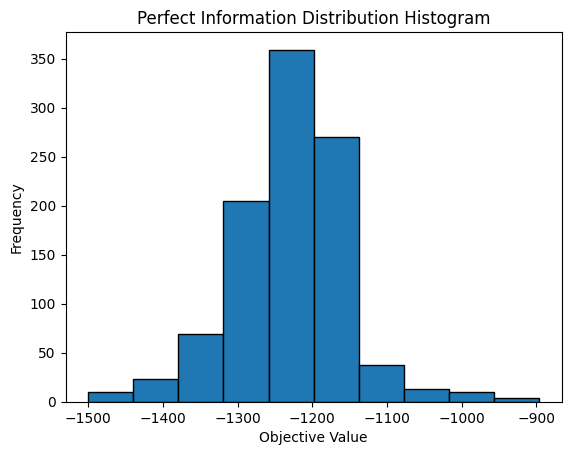

In [28]:
plt.hist(pid_values, bins=10, edgecolor='black')
plt.xlabel('Objective Value')
plt.ylabel('Frequency')
plt.title('Perfect Information Distribution Histogram')
plt.show()

### Expected Value of Perfect Information (EVPI )

How much we would gain (in expectation) if we could know future demand perfectly in advance.

EVPI Formula

$
\begin{array}{rrlr}
 & \text{EVPI} & = \text{Wait-and-See (WS)} & − & \text{Recourse Problem (RP)}
\end{array}
$

Where:

WS = Average of the perfect-information solutions

RP = Objective value of the original stochastic model

In [29]:
ws_total = 0
for i in range(n):
    ws_total += solve_wait_and_see(i)[0]

ws_final = ws_total / n
print("Wait-and-See (WS):", ws_final)


Wait-and-See (WS): -1228.931686666667


In [44]:
RP = m_demand.objective_value
EVPI = RP - ws_final

print(f"EVPI = RP - WS = {RP:.2f} - {ws_final:.2f}  = {EVPI:.2f}") # minimization context


EVPI = RP - WS = -1592.52 - -1228.93  = -363.58


### Expected Value Solution (EVS).

In the Mean Value Problem, we replace the random variables with their average values across all scenarios. Then we solve one deterministic optimization problem using these average demands. The optimal value of that problem is called the Expected Value Solution (EVS).

In [31]:
def solve_mean_value_problem():
    # Step 1: average demand over all scenarios
    mean_demand = np.mean(d, axis=1)  # [mean_dA, mean_dB, mean_dm, mean_dp]

    m_evs = Model(name='mean_value_problem', log_output=False)

    # Decision variables
    x = m_evs.continuous_var_list(3, lb=0, name='x')
    y = m_evs.continuous_var_list(4, lb=0, name='y')
    z = m_evs.continuous_var_list(2, lb=0, name='z')

    # Constraints
    m_evs.add_constraint(x[0] + x[1] <= Sn)
    m_evs.add_constraint(x[2] <= Sm)
    m_evs.add_constraint(sum(x[j] * c[j] for j in range(3)) <= C)

    # Demand constraints using average demand
    m_evs.add_constraint(y[0] <= mean_demand[0])
    m_evs.add_constraint(y[1] <= mean_demand[1])
    m_evs.add_constraint(y[2] <= mean_demand[2])
    m_evs.add_constraint(y[3] <= mean_demand[3])

    # Inventory-use constraints
    m_evs.add_constraint(y[0] + y[3] + z[0] <= x[0])
    m_evs.add_constraint(y[1] + z[1] <= x[1])
    m_evs.add_constraint(y[2] + y[3] <= x[2])

    # Objective: maximize profit
    obj = (
        sum(p[j] * y[j] for j in range(4)) +
        sum(r[j] * z[j] for j in range(2)) -
        sum(c[j] * x[j] for j in range(3))
    )
    m_evs.set_objective('min', obj)
    m_evs.solve()

    return m_evs.objective_value, m_evs

In [32]:
evs_value, evs_model = solve_mean_value_problem()
print("Expected Value Solution (EVS):", evs_value)

Expected Value Solution (EVS): -500.0


### Expected Value Distribution (EVD)

Once we solve the Mean Value Problem (MVP) and get the EVS decision variables (i.e., x_EVS), we can evaluate how that fixed EVS solution performs under all demand scenarios.

In [33]:
# extract decision variables values
x_evs = [evs_model.solution.get_value(evs_model.get_var_by_name(f'x_{j}')) for j in range(3)]

In [34]:
x_evs

[0, 0, 66.66666666666667]

Now, evaluate under each demand scenario:

In [35]:
evd_values = []

for i in range(n):
    m_evd = Model(name=f'evd_{i}', log_output=False)

    # EVS x fixed (not variables now)
    x = x_evs

    # Variables only for second stage
    y = m_evd.continuous_var_list(4, lb=0, name='y')
    z = m_evd.continuous_var_list(2, lb=0, name='z')

    # Demand for this scenario
    dA, dB, dm, dp = d[:, i]

    # Constraints
    m_evd.add_constraint(y[0] <= dA)
    m_evd.add_constraint(y[1] <= dB)
    m_evd.add_constraint(y[2] <= dm)
    m_evd.add_constraint(y[3] <= dp)

    m_evd.add_constraint(y[0] + y[3] + z[0] <= x[0])
    m_evd.add_constraint(y[1] + z[1] <= x[1])
    m_evd.add_constraint(y[2] + y[3] <= x[2])

    # Objective (same structure as before)
    obj = (
        sum(p[j] * y[j] for j in range(4)) +
        sum(r[j] * z[j] for j in range(2)) -
        sum(c[j] * x[j] for j in range(3))  # cost is constant across scenarios
    )
    m_evd.set_objective('max', obj)
    m_evd.solve()

    evd_values.append(m_evd.objective_value)


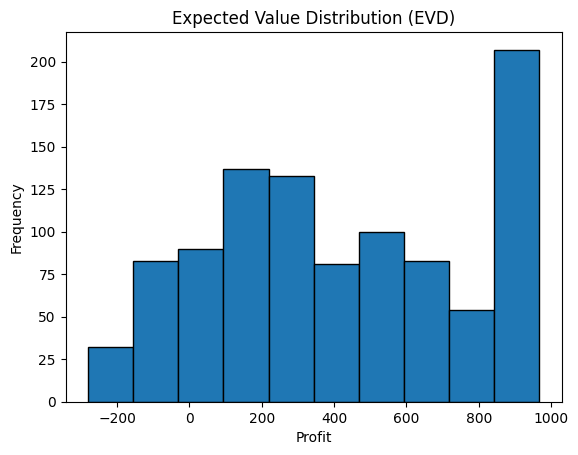

In [36]:
plt.hist(evd_values, bins=10, edgecolor='black')
plt.title("Expected Value Distribution (EVD)")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

In [37]:
EVS_performance = sum(evd_values) / len(evd_values)

In [38]:
EVS_performance

423.7140000000008

### Value of the Stochastic Solution (VSS)

$
\begin{array}{r}
    & \text{VSS =} \text{EVS} - \text{Recourse Problem (RP)} \\ \\
    \text{where:} &  \\ \\
    & \text{RP:} \text{the objective value of your stochastic model}
\end{array}
$

In [39]:
EVS_performance = sum(evd_values) / len(evd_values)
RP = m_demand.objective_value
VSS = EVS_performance - RP

print(f"EVS (mean value solution): {evs_value}")
print(f"EVS Performance (applied to scenarios): {EVS_performance}")
print(f"RP (stochastic model result): {RP}")
print(f"VSS = EVS_performance - RP = {VSS}")

EVS (mean value solution): -500.0
EVS Performance (applied to scenarios): 423.7140000000008
RP (stochastic model result): -1592.5162996666663
VSS = EVS_performance - RP = 2016.2302996666672


Plot comparisons between WS, RP, EVS

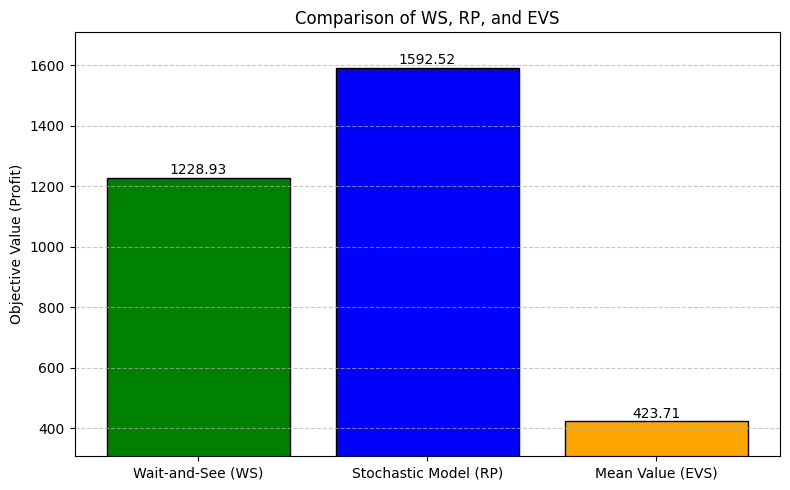

In [41]:
# Sample values (replace with your actual results)
#WS - # Wait-and-See average value
#RP - Stochastic model result (from m_demand.objective_value)
#EVS  # Mean value solution performance

# Labels and values
labels = ['Wait-and-See (WS)', 'Stochastic Model (RP)', 'Mean Value (EVS)']
values = [-ws_final, -RP, EVS_performance]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['green', 'blue', 'orange'], edgecolor='black')
plt.ylabel('Objective Value (Profit)')
plt.title('Comparison of WS, RP, and EVS')

# Annotate bar values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')

# plt.ylim(0, max(values) * 1.2)
y_lower = min(values)
y_upper = max(values)
margin = 0.1 * (y_upper - y_lower)
plt.ylim(y_lower - margin, y_upper + margin)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

A chart comparison between:

    ✅ Wait-and-See (WS) — perfect foresight

    ✅ Stochastic Model (RP) — your original model

    ✅ Mean Value Solution (EVS) — based on average demand

#### Interpretation

- The difference:

    - EVPI = RP - WS (value of knowing the future)

    - VSS = EVS - RP (value of modeling uncertainty)